In [54]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
data = pd.read_csv(r'C:\Users\Zenia\Downloads/houses_to_rent.csv')
data.head()

,Unnamed: 0,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,0,1,240,3,3,4,-,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,1,0,64,2,1,1,10,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493"
2,2,1,443,5,5,4,3,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,3,1,73,2,2,1,12,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,4,1,19,1,1,0,-,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"


In [56]:
"""
df = pd.read_csv('/kaggle/input/brasilian-houses-to-rent/houses_to_rent.csv',index_col=['Unnamed: 0'])
df.drop_duplicates(inplace=True)
df['floor'] = df['floor'].replace('-',np.nan)
df['floor']= df['floor'].fillna(df['floor'].median()).astype('int')


"""



data = data.drop(['Unnamed: 0', 'floor'], axis = 1)
data.head()

,city,area,rooms,bathroom,parking spaces,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,1,240,3,3,4,acept,furnished,R$0,"R$8,000","R$1,000",R$121,"R$9,121"
1,0,64,2,1,1,acept,not furnished,R$540,R$820,R$122,R$11,"R$1,493"
2,1,443,5,5,4,acept,furnished,"R$4,172","R$7,000","R$1,417",R$89,"R$12,680"
3,1,73,2,2,1,acept,not furnished,R$700,"R$1,250",R$150,R$16,"R$2,116"
4,1,19,1,1,0,not acept,not furnished,R$0,"R$1,200",R$41,R$16,"R$1,257"


In [64]:
data['hoa'].value_counts()

R$0         1291
Sem info     119
Incluso       83
R$1,000       82
R$1,200       71
            ... 
R$1,497        1
R$447          1
R$716          1
R$1,174        1
R$855          1
Name: hoa, Length: 1292, dtype: int64

In [66]:
data['hoa'] = data['hoa'].replace('Sem info','0')
data['hoa'] = data['hoa'].replace('Incluso','0')

In [67]:
data['property tax'].value_counts()

R$0        1053
R$84         83
R$100        82
R$50         79
R$250        77
           ... 
R$1,270       1
R$206         1
R$2,658       1
R$3,772       1
R$1,165       1
Name: property tax, Length: 1036, dtype: int64

In [68]:
data['property tax'] = data['property tax'].replace('Sem info','0')
data['property tax'] = data['property tax'].replace('Incluso','0')

In [69]:
data.isnull().sum()

city              0
area              0
rooms             0
bathroom          0
parking spaces    0
animal            0
furniture         0
hoa               0
rent amount       0
property tax      0
fire insurance    0
total             0
dtype: int64

Cleaning the Real Sign (R$)
After that, we note that the hoa, rent amount, prop tax, fire insurance, and total is in Brazilian Real.

In [70]:

def extract_value_from(Value):
    out = Value.replace('R$', '')
    out_ = out.replace(',', '')
    out_ = float(out_)
    return out_
    
    
    
data['hoa'] = data['hoa'].apply(lambda x: extract_value_from(x))
data['rent amount'] = data['rent amount'].apply(lambda x: extract_value_from(x))
data['property tax'] = data['property tax'].apply(lambda x: extract_value_from(x))
data['fire insurance'] = data['fire insurance'].apply(lambda x: extract_value_from(x))
data['total'] = data['total'].apply(lambda x: extract_value_from(x))





In [71]:
#another way:
"""
def remove_dollar(x):
    a = x[2:]
    result = ""
    for i in a:
        if i.isdigit() is True:
            result = result + i
        return result

"""

#explained in my way:
    
"""
def remove_dollar_sign(value_x):
    considered_value = value_x[2:] #since the value is mentioned as R$7000
    value_after_removed = ""
    
    for i in considered_value:
        if i.isdigit() is True:
            value_after_removed = value_after_removed + i
        return value_after_removed


"""

'\ndef remove_dollar_sign(value_x):\n    considered_value = value_x[2:] #since the value is mentioned as R$7000\n    value_after_removed = ""\n    \n    for i in considered_value:\n        if i.isdigit() is True:\n            value_after_removed = value_after_removed + i\n        return value_after_removed\n\n\n'

In [ ]:
#another way:
    
"""
import re
df['total'] = df['total'].map(lambda x: re.sub(r'\D+', '', x))
df['hoa'] = df['hoa'].map(lambda x: re.sub(r'\D+', '', x))
df['rent amount'] = df['rent amount'].map(lambda x: re.sub(r'\D+', '', x))
df['fire insurance'] = df['fire insurance'].map(lambda x: re.sub(r'\D+', '', x))
df['property tax'] = df['property tax'].map(lambda x: re.sub(r'\D+', '', x))

"""

In [72]:
"""

data['hoa'] = pd.to_numeric(data['hoa'].apply(remove_dollar), errors = 'ignore')
data['rent amount'] = pd.to_numeric(data['rent amount'].apply(remove_dollar), errors = 'ignore' )
data['property tax'] = pd.to_numeric(data['property tax'].apply(remove_dollar), errors = 'ignore' )
data['fire insurance'] = pd.to_numeric(data['fire insurance'].apply(remove_dollar), errors = 'ignore' )
data['total'] = pd.to_numeric(data['total'].apply(remove_dollar), errors = 'ignore' )

"""



"\n\ndata['hoa'] = pd.to_numeric(data['hoa'].apply(remove_dollar), errors = 'ignore')\ndata['rent amount'] = pd.to_numeric(data['rent amount'].apply(remove_dollar), errors = 'ignore' )\ndata['property tax'] = pd.to_numeric(data['property tax'].apply(remove_dollar), errors = 'ignore' )\ndata['fire insurance'] = pd.to_numeric(data['fire insurance'].apply(remove_dollar), errors = 'ignore' )\ndata['total'] = pd.to_numeric(data['total'].apply(remove_dollar), errors = 'ignore' )\n\n"

In [73]:
data.dtypes

city                int64
area                int64
rooms               int64
bathroom            int64
parking spaces      int64
animal             object
furniture          object
hoa               float64
rent amount       float64
property tax      float64
fire insurance    float64
total             float64
dtype: object

In [74]:
data.head()

,city,area,rooms,bathroom,parking spaces,animal,furniture,hoa,rent amount,property tax,fire insurance,total
0,1,240,3,3,4,acept,furnished,0.0,8000.0,1000.0,121.0,9121.0
1,0,64,2,1,1,acept,not furnished,540.0,820.0,122.0,11.0,1493.0
2,1,443,5,5,4,acept,furnished,4172.0,7000.0,1417.0,89.0,12680.0
3,1,73,2,2,1,acept,not furnished,700.0,1250.0,150.0,16.0,2116.0
4,1,19,1,1,0,not acept,not furnished,0.0,1200.0,41.0,16.0,1257.0


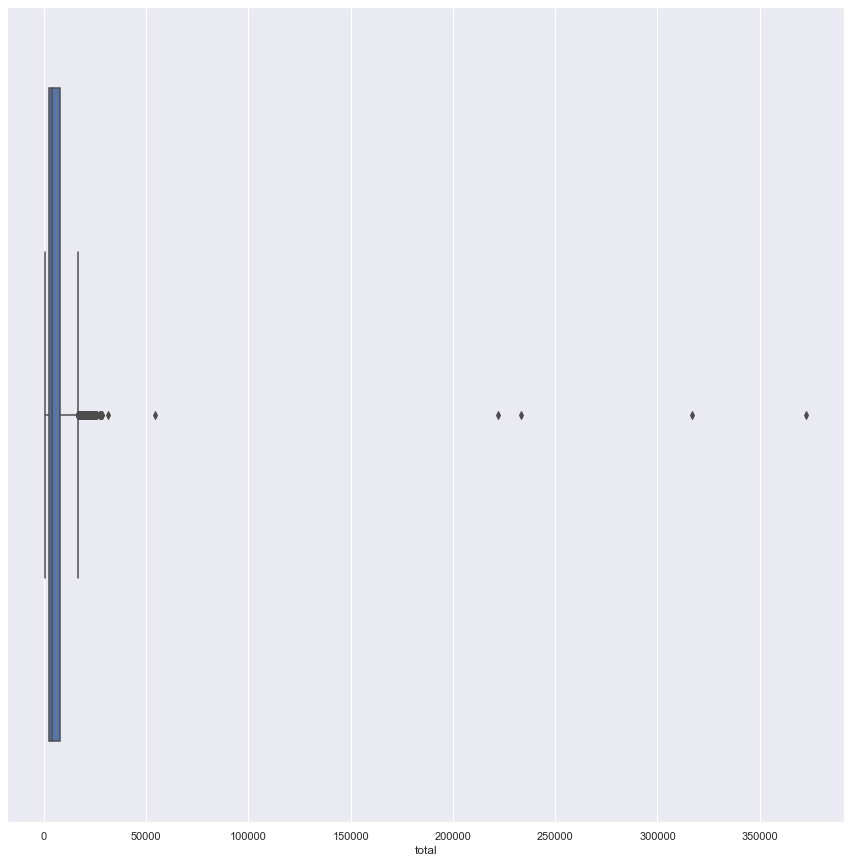

In [81]:
plt.figure(figsize = (15, 15))
sns.boxplot(data['total'])

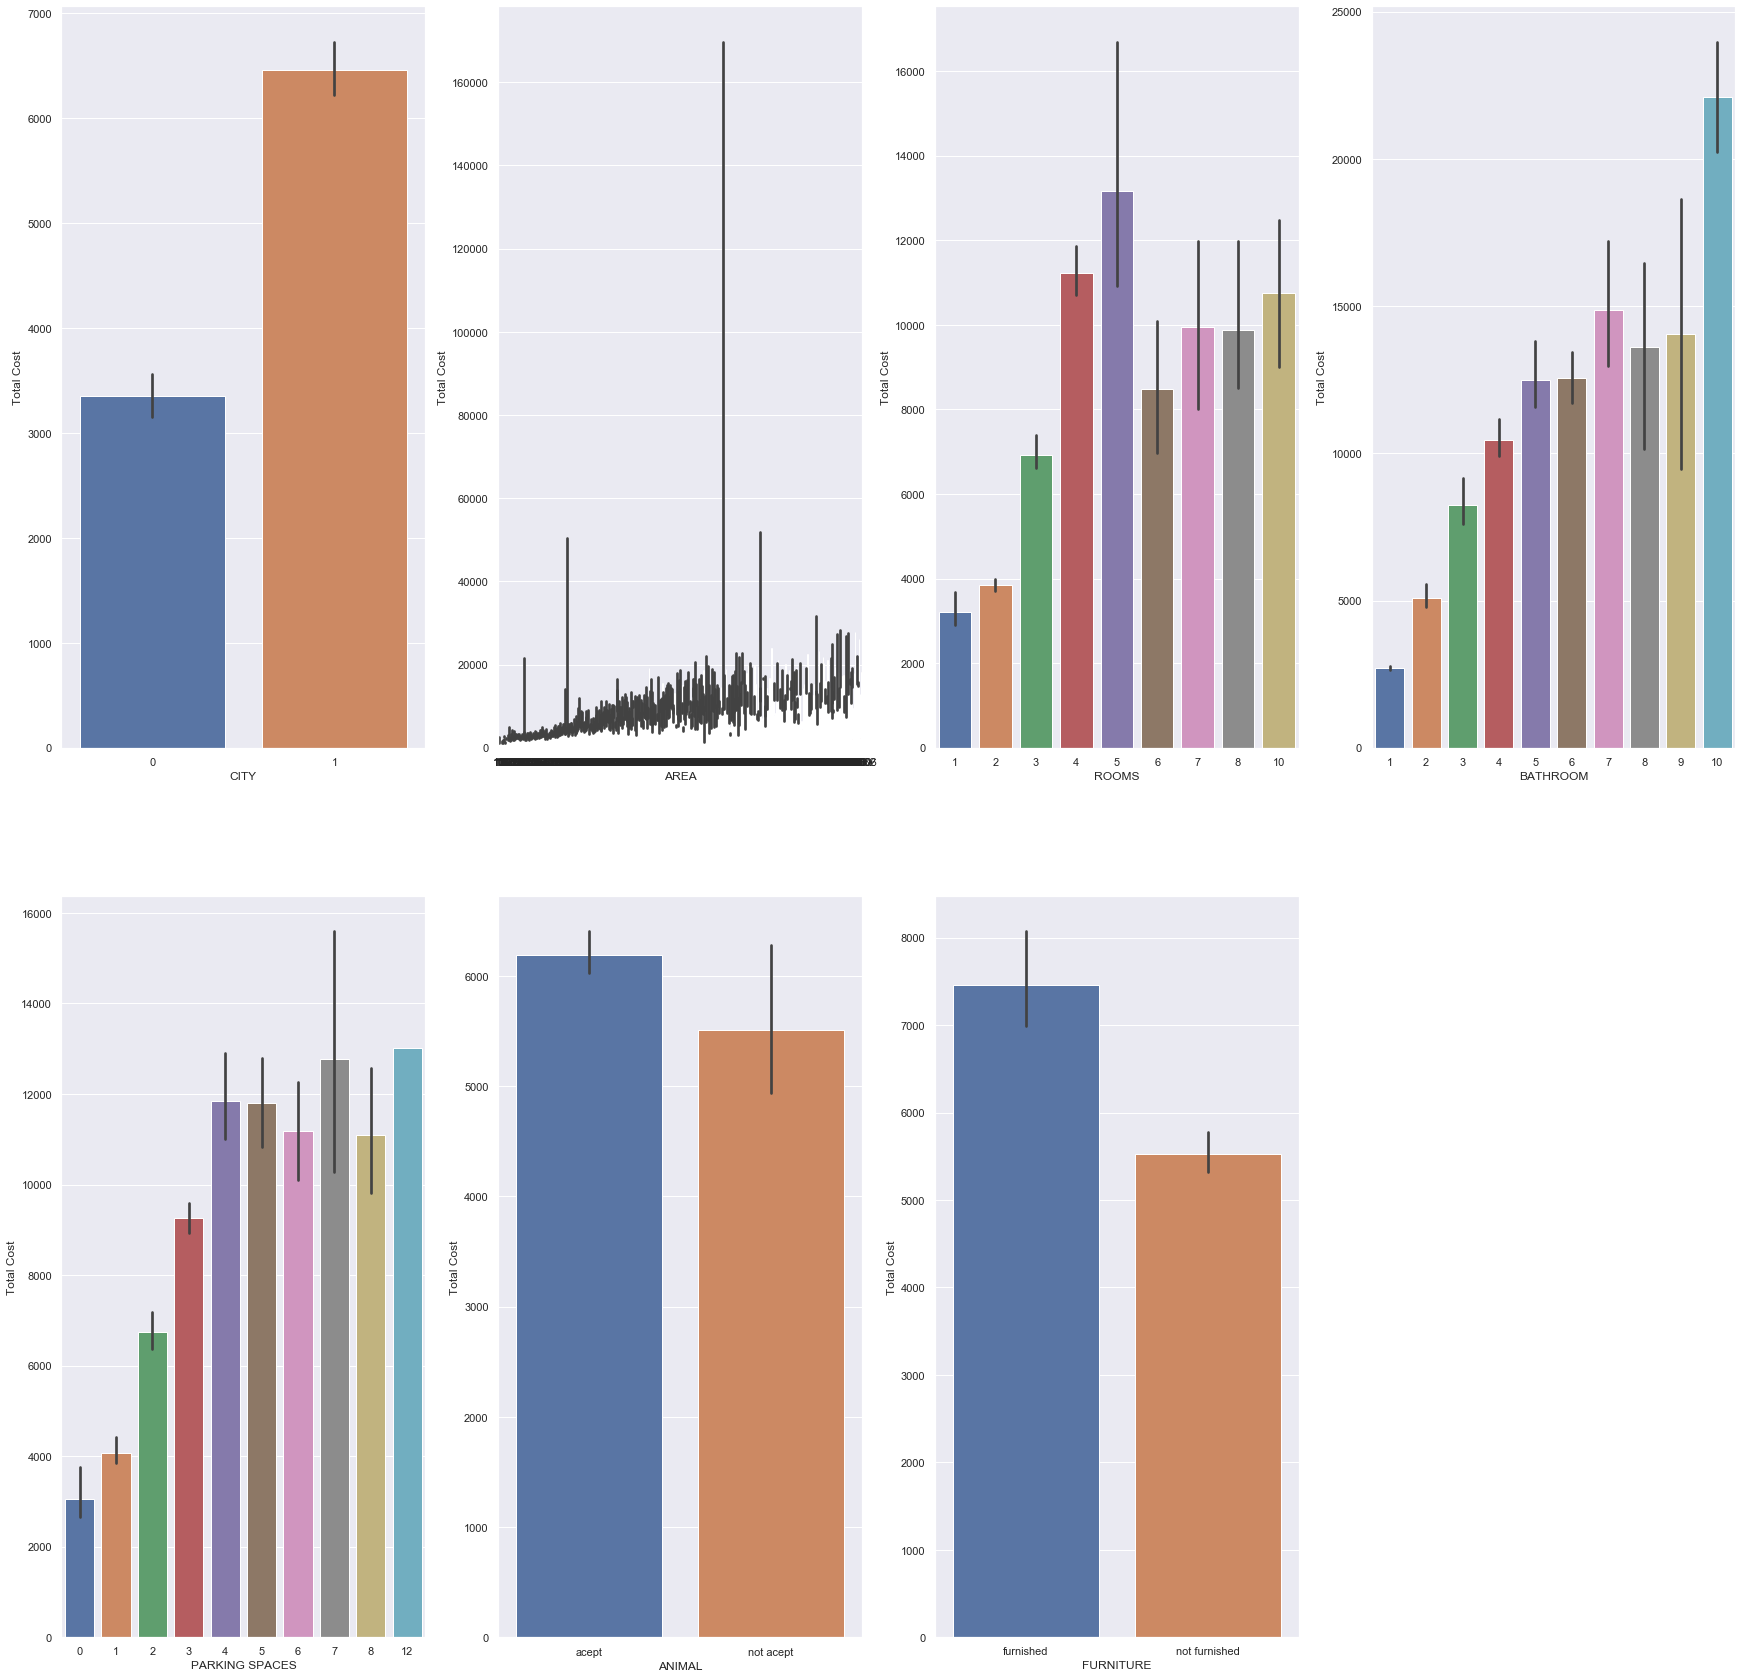

In [76]:
columns = ['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'animal', 'furniture']
plt.figure(figsize = (30,30))
for i,var in enumerate(columns,1):
    plt.subplot(2,4,i)
    f = sns.barplot(x = data[var], y = data["total"])
    f.set_xlabel(var.upper())
    f.set_ylabel("Total Cost")

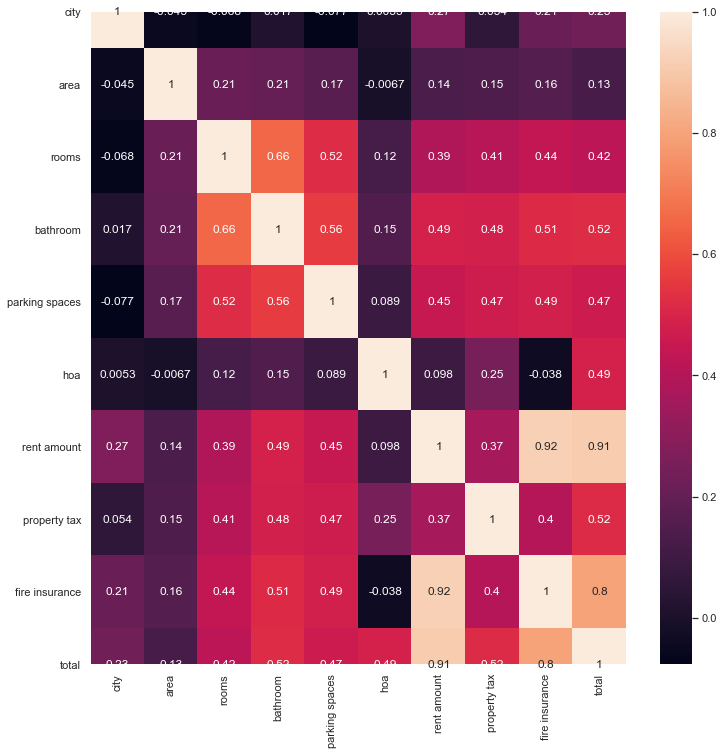

In [90]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), annot=True)

In [91]:
data.describe()

,city,area,rooms,bathroom,parking spaces,hoa,rent amount,property tax,fire insurance,total
count,3849.000000,3849.000000,3849.000000,3849.000000,3849.000000,3849.000000,3849.000000,3849.000000,3849.000000,3849.000000
mean,0.814497,90.482203,2.046246,1.651858,1.124188,533.610288,2282.626916,118.114315,29.754222,2964.571577
std,0.388755,213.623409,0.921527,0.902107,1.138834,479.864491,1037.889167,150.761930,15.378620,1268.934598
min,0.000000,10.000000,1.000000,1.000000,0.000000,0.000000,420.000000,0.000000,3.000000,660.000000
25%,1.000000,49.000000,1.000000,1.000000,0.000000,0.000000,1465.000000,5.000000,18.000000,1930.000000
50%,1.000000,70.000000,2.000000,1.000000,1.000000,484.000000,2100.000000,70.000000,27.000000,2801.000000
75%,1.000000,102.000000,3.000000,2.000000,2.000000,799.000000,3000.000000,167.000000,39.000000,3974.000000
max,1.000000,12732.000000,7.000000,7.000000,8.000000,3398.000000,5500.000000,2500.000000,83.000000,5622.000000


In [92]:
print("Skewness: ", data['total'].skew())
print("Kurtosis: ", data['total'].kurt())

Skewness:  0.2771226350164149
Kurtosis:  -0.951968583754351


Okay then, we need to remove outliers using interquartile score

In [93]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

city                 0.0
area                53.0
rooms                2.0
bathroom             1.0
parking spaces       2.0
hoa                799.0
rent amount       1535.0
property tax       162.0
fire insurance      21.0
total             2044.0
dtype: float64


Text(0.5, 1.0, 'Total Price KDE')

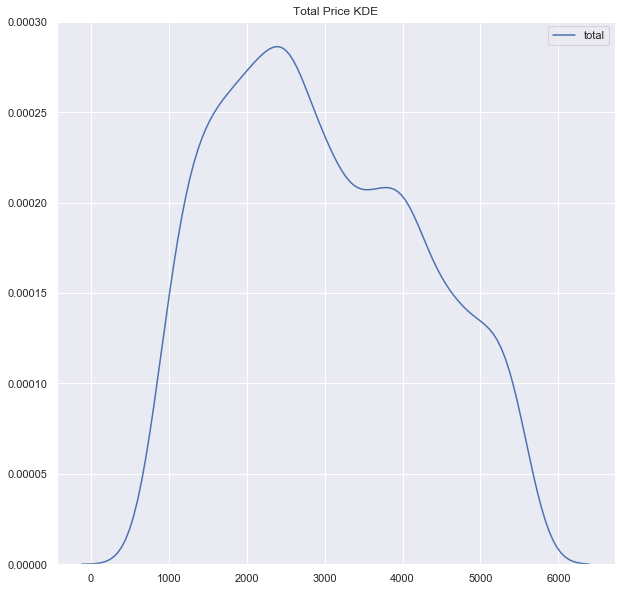

In [94]:
plt.figure(figsize=(10,10))
sns.set()
sns.kdeplot(data['total'])
plt.title('Total Price KDE')

so Rows with total price more than 5622.5 are removed

In [95]:
data = data[data['total']<= 5622.5]
data.head() #initially the total was 5622.5 and there was very few values at the right after 5622.5, so they're removed

,city,area,rooms,bathroom,parking spaces,animal,furniture,hoa,rent amount,property tax,fire insurance,total
1,0,64,2,1,1,acept,not furnished,540.0,820.0,122.0,11.0,1493.0
3,1,73,2,2,1,acept,not furnished,700.0,1250.0,150.0,16.0,2116.0
4,1,19,1,1,0,not acept,not furnished,0.0,1200.0,41.0,16.0,1257.0
5,1,13,1,1,0,acept,not furnished,0.0,2200.0,42.0,28.0,2270.0
7,1,55,2,2,1,acept,not furnished,600.0,1300.0,67.0,17.0,1984.0


What we got from total price:

1.Positive skewness

2.Deviate from normal distribution

# Total price and other price component

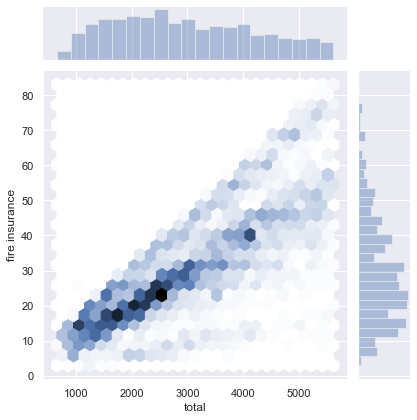

In [96]:
sns.jointplot(data['total'], data['fire insurance'], kind="hex", color="b")

# Relation

Text(0.5, 1.0, 'City and Total Price')

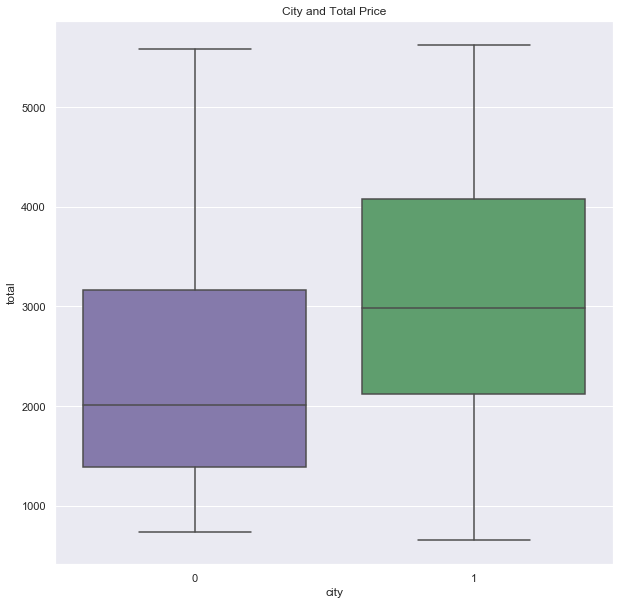

In [97]:
plt.figure(figsize=(10,10))
sns.boxplot(x="city", y="total", palette=["m", "g"], data=data)
plt.title('City and Total Price')

Text(0.5, 1.0, 'Room and Total Price')

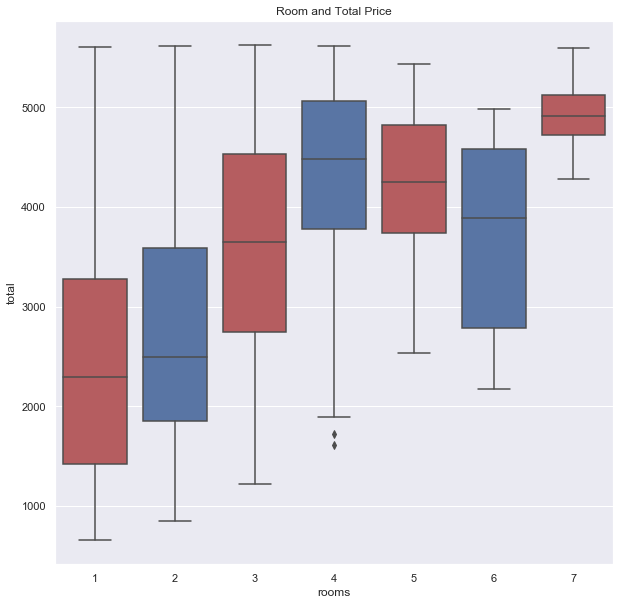

In [98]:
plt.figure(figsize=(10,10))
sns.boxplot(x="rooms", y="total", palette=["r", "b"], data=data)
plt.title('Room and Total Price')

Text(0.5, 1.0, 'Bathroom and Total Price')

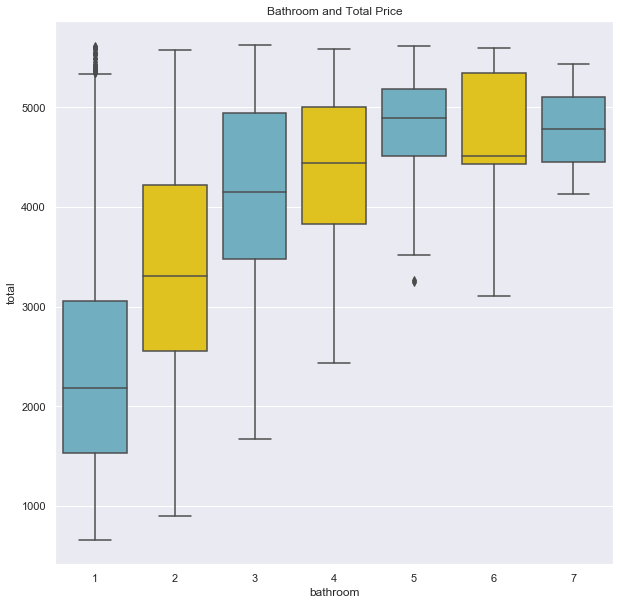

In [99]:
plt.figure(figsize=(10,10))
sns.boxplot(x="bathroom", y="total", palette=["c", "gold"], data=data)
plt.title('Bathroom and Total Price')

Text(0.5, 1.0, 'Parking Spaces and Total Price')

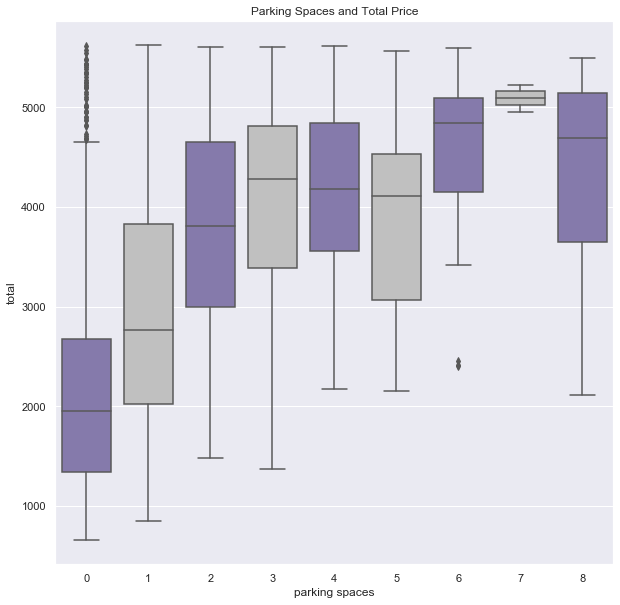

In [100]:
plt.figure(figsize=(10,10))
sns.boxplot(x="parking spaces", y="total", palette=["m", "silver"], data=data)
plt.title('Parking Spaces and Total Price')

Text(0.5, 1.0, 'Animal and Total Price')

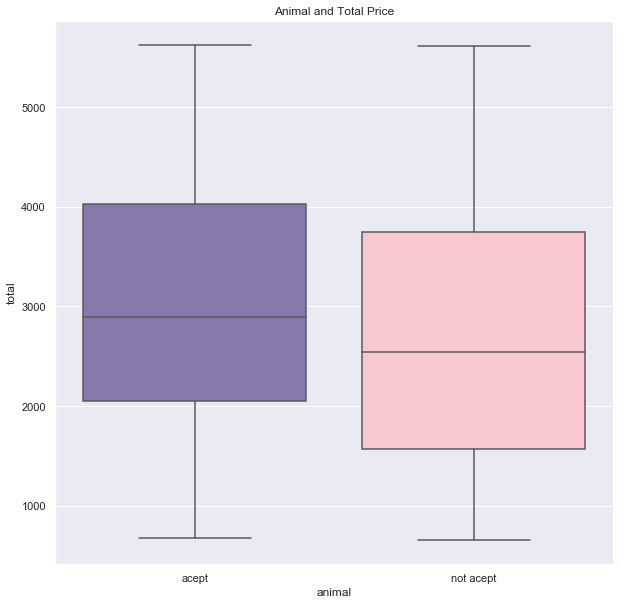

In [103]:
plt.figure(figsize=(10,10))
sns.boxplot(x="animal", y="total", palette=["m", "pink"], data=data)
plt.title('Animal and Total Price')

In [104]:
data['animal'].value_counts()

acept        2864
not acept     985
Name: animal, dtype: int64

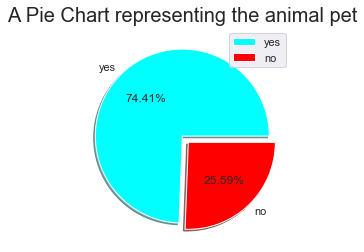

In [106]:
size = [2864,985]
labels = ['yes', 'no']
colors = ['cyan', 'red']
explode = [0, 0.1]

plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('A Pie Chart representing the animal pet', fontsize = 20)
plt.legend()
plt.show()

In [107]:
data['total'] = data['total'].astype('float')


 mu = 2964.57 and sigma = 1268.77



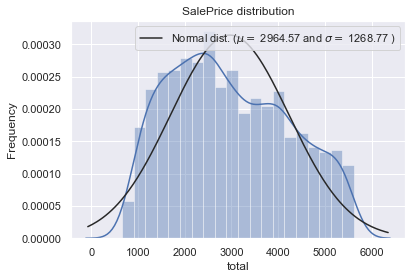

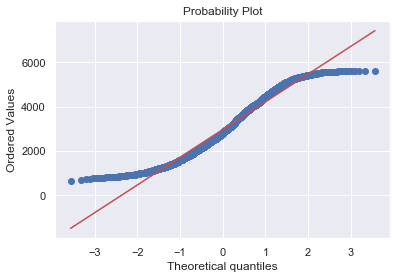

In [108]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

sns.distplot(data['total'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['total'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(data['total'], plot=plt)
plt.show()

In [109]:
df = data.copy()
df.head()

,city,area,rooms,bathroom,parking spaces,animal,furniture,hoa,rent amount,property tax,fire insurance,total
1,0,64,2,1,1,acept,not furnished,540.0,820.0,122.0,11.0,1493.0
3,1,73,2,2,1,acept,not furnished,700.0,1250.0,150.0,16.0,2116.0
4,1,19,1,1,0,not acept,not furnished,0.0,1200.0,41.0,16.0,1257.0
5,1,13,1,1,0,acept,not furnished,0.0,2200.0,42.0,28.0,2270.0
7,1,55,2,2,1,acept,not furnished,600.0,1300.0,67.0,17.0,1984.0


[Text(0, 0.5, 'Price'), Text(0.5, 0, 'bathroom / bathroom')]

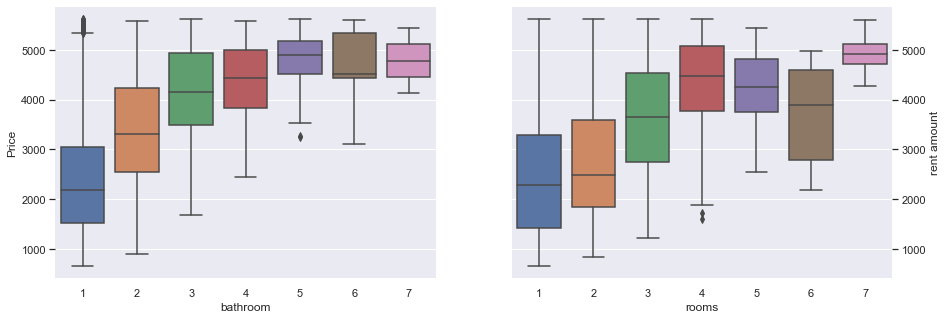

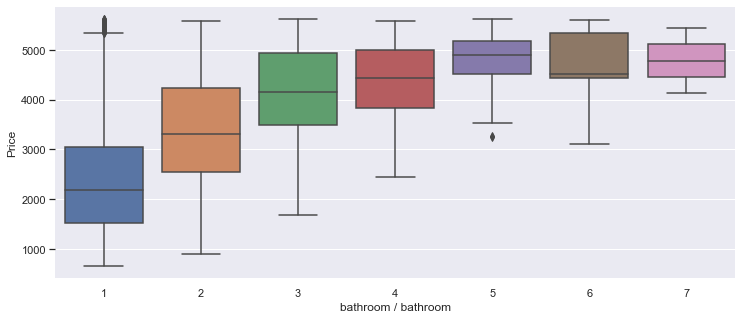

In [111]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=df['bathroom'],y=df['total'], ax=axes[0])
sns.boxplot(x=df['rooms'],y=df['total'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='bathroom', ylabel='Price')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='rooms', ylabel='rent amount')

f, axe = plt.subplots(1, 1,figsize=(12.18,5))
sns.despine(left=True, bottom=True)
sns.boxplot(x=df['bathroom'],y=df['total'], ax=axe)
axe.yaxis.tick_left()
axe.set(xlabel='bathroom / bathroom', ylabel='Price')

In [112]:
new_df = df.copy()

new_df['hoa'] = pd.to_numeric(new_df['hoa'])
new_df['hoa'] = new_df['hoa'].astype('float')
new_df['rent amount'] = new_df['rent amount'].astype('float')
new_df['property tax'] = pd.to_numeric(new_df['property tax'])
new_df['property tax'] = new_df['property tax'].astype('float')
new_df['fire insurance'] = new_df['fire insurance'].astype('float')
new_df['total'] = new_df['total'].astype('float')

In [113]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
model = linear_model.LinearRegression()

In [115]:

new_df['animal'] = new_df['animal'].map({
    'acept':'Yes',
    'not acept':'No'
})
new_df['furniture']= new_df['furniture'].map({
    'not furnished':'unfurnished',
    'furnished':'furnished'
})


la = LabelEncoder()
new_df['animal'] = la.fit_transform(new_df['animal'])
new_df['furniture'] =la.fit_transform(new_df['furniture'])



new_df['hoa'] = new_df['hoa'].fillna(0)
new_df['property tax'] = new_df['property tax'].fillna(0)



In [116]:
x = new_df.drop('total',axis='columns')
y = new_df.total



X_train,X_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=0)

model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [117]:
model.score(X_train,y_train)



0.9999141148166942

In [118]:
y_predicted = model.predict(X_test)

In [119]:
# finding the mean_squared error
mse = mean_squared_error(y_test, y_predicted)
print("RMSE Error:", np.sqrt(mse))

# finding the r2 score or the variance
r2 = r2_score(y_test, y_predicted)
print("R2 Score:", r2)

RMSE Error: 1.3635587710454649
R2 Score: 0.9999988290833471


In [120]:
new_df['animal'].value_counts()

1    2864
0     985
Name: animal, dtype: int64

In [121]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state =1 )
model = linear_model.LinearRegression()
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid = GridSearchCV(model,parameters, cv=None)
grid.fit(X_train, y_train)

print("Residual sum of squares: %.2f"
              % np.mean((grid.predict(X_test) - y_test) ** 2))

Residual sum of squares: 182.04


In [122]:
print ("r2 / variance : ",grid.best_score_)

r2 / variance :  0.9999406954047927
